# Naive Bayes Implementation

In [1]:
# fundamental DS libraries
import numpy as np
import pandas as pd

# some external libraries if any


# Preprocessing libraries: train_test_split,preprocessing, feature_selection
# model_selection

# machine learning algor


# performance measures: ex. metric

# hyperparameter tuning algos: GridSearchCV

## Use Iris flower dataset

In [3]:
df = pd.read_csv('IRIS.csv')
df[:2]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


## Separate Input and output

In [6]:
X = df.drop(columns='species')
X[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
y = df.species
y[:3]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
Name: species, dtype: object

## Split dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [10]:
X_train[:2]

,sepal_length,sepal_width,petal_length,petal_width
16,5.4,3.9,1.3,0.4
126,6.2,2.8,4.8,1.8


## Create a model first

In [11]:
from sklearn.naive_bayes import GaussianNB
#bcz independant variable has contineous values will select GussianNB

#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import BernoulliNB

In [12]:
gnb = GaussianNB()

## Model training

In [13]:
gnb.fit(X_train,y_train)

GaussianNB()

## Model Testing

In [16]:
y_pred = gnb.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa'], dtype='<U15')

In [15]:
X_test[:3]

,sepal_length,sepal_width,petal_length,petal_width
65,6.7,3.1,4.4,1.4
57,4.9,2.4,3.3,1.0
42,4.4,3.2,1.3,0.2


In [17]:
y_test

65     Iris-versicolor
57     Iris-versicolor
42         Iris-setosa
115     Iris-virginica
117     Iris-virginica
107     Iris-virginica
79     Iris-versicolor
141     Iris-virginica
89     Iris-versicolor
93     Iris-versicolor
99     Iris-versicolor
11         Iris-setosa
77     Iris-versicolor
108     Iris-virginica
100     Iris-virginica
138     Iris-virginica
114     Iris-virginica
2          Iris-setosa
76     Iris-versicolor
43         Iris-setosa
130     Iris-virginica
59     Iris-versicolor
53     Iris-versicolor
103     Iris-virginica
131     Iris-virginica
45         Iris-setosa
143     Iris-virginica
8          Iris-setosa
125     Iris-virginica
10         Iris-setosa
Name: species, dtype: object

## Now check performance using accuracy measures

In [18]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 7,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 13]], dtype=int64)

In [23]:
lb = np.unique(y_test)
lb

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(33.0, 0.5, 'Actual')

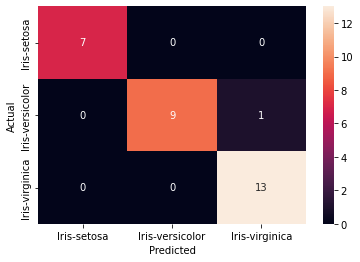

In [30]:
import seaborn as sns

ax = sns.heatmap(cm,annot=True,xticklabels=lb,yticklabels=lb)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

In [33]:
sum(y_test =='Iris-versicolor')

10

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

96.66666666666667